<h1><center>Lab 4 </center></h1>

# WORK DURING THE LAB
1. Implement the algorithm Simulated Annealing for TSP.
2. Test the algorithm for the same two problem instances selected in the previous lab,
considering different parameter settings.

Points for the work during the lab: 25p

### General functions for TSP

In [1]:
import numpy as np

def load_tsp_data(file_name: str) -> list[tuple[float, float]]:
    """
    Load TSP data from file
    Input:
        file_name: str, name of the file containing TSP data
    Output:
        list of tuples: each tuple contains (x, y) coordinates of a city
    """
    with open(file_name) as f:
        lines = f.readlines()
        data = []
        start_reading = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                data.append((float(parts[1]), float(parts[2])))
    return data

def euclidean_distance(city1: tuple[float, float], city2: tuple[float, float]) -> float:
    """
    Calculate the Euclidean distance between two cities
    Input:
        city1: tuple, (x, y) coordinates of city 1
        city2: tuple, (x, y) coordinates of city 2
    Output:
        float: Euclidean distance between the two cities
    """
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def random_tour(cities: list[tuple[float, float]]) -> list[int]:
    """
    Generate random tours by shuffling the cities
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        list: list of random tours
    """
    n = len(cities)
    tour = np.random.permutation(n).tolist()
    return tour


def fitness_tsp(tour: list[int], cities: list[tuple[float, float]]) -> float:
    """
    Calculate the total distance of the tour.
    Input:
        tour: list of city indices representing the tour
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        float: total distance of the tour
    """
    total_distance = 0.0
    n = len(tour)
    for i in range(n):
        total_distance += euclidean_distance(cities[tour[i]], cities[tour[(i + 1) % n]])  # Wrap around

    # Return distance rounded for better readability
    return round(total_distance, 2)



## Simulated Annealing for TSP


Simulated Annealing (SA) is a probabilistic optimization algorithm inspired by the annealing process in metallurgy. It is used to find an approximate solution to an optimization problem, in this case, the Traveling Salesman Problem (TSP). The algorithm explores the solution space by accepting not only improvements but also worse solutions with a probability that decreases over time. This helps in escaping local optima and potentially finding a global optimum.

Key components of Simulated Annealing:


 - Temperature (T): Controls the probability of accepting worse solutions. It starts high and gradually decreases.
  - Cooling Schedule: Defines how the temperature decreases over time.

  - Perturbation: A method to generate a neighboring solution, often by making small changes to the current solution.



### Pseudocode for Simulated Annealing

    begin
        t = 0
        intialize T
        select a current point c at random
        evaluate c
        repeat
            repeat
                select new point x from neighbours of c
                if eval(x) < eval(c) then
                    c = x
                else if random [0,1) < exp((eval(c) - eval(x))/T) then
                    c = x
            until stopping criterion is met
            T = g(T, t)
            t = t + 1
        until (halting criterion)
    end

Function g (cooling):

   - Linear: T = T * alpha (alpha is in (0, 1), closer to 1)

In [16]:
def random_2opt_move(tour: list[int]) -> list[int]:
    """
    Apply a random 2-opt move to the given tour.
    Input:
        tour: list of city indices representing the current tour
    Output:
        new_tour: list of city indices representing the tour after the 2-opt move
    """
    i, j = sorted(np.random.choice(len(tour), 2, replace=False))  # Pick two distinct indices
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]


# Set print options to disable scientific notation
np.set_printoptions(suppress=True, precision=6)

def simulated_annealing_tsp(cities: list[tuple[float, float]], max_iter: int, T: float, Tmin: float, alpha: float) -> tuple[list[int], float]:
    """
    Simulated Annealing for TSP
    Input:

        cities: list of tuples, each tuple contains (x, y) coordinates of a city
        max_iter: int, maximum number of iterations
        T: float, initial temperature
        Tmin: float, minimum temperature
        alpha: float, cooling rate
    Output:
        tuple: best tour and its distance
    """
    n = len(cities)
    current_tour = random_tour(cities)
    current_distance = fitness_tsp(current_tour, cities)
    best_tour = current_tour[:]
    best_distance = fitness_tsp(current_tour, cities)

    while T > Tmin:
        for t in range (max_iter):
            new_tour = random_2opt_move(current_tour)
            new_distance = fitness_tsp(new_tour, cities)

            if new_distance < current_distance:
                current_tour = new_tour[:]
                current_distance = new_distance
            else:
                probability = np.exp((current_distance - new_distance) / T)
                if np.random.rand() < probability:
                    current_tour = new_tour[:]
                    current_distance = new_distance
            if current_distance < best_distance:
                best_tour = current_tour[:]
                best_distance = current_distance

        T = T * alpha

    return best_tour, best_distance

## Testing the algorithm for different parameter settings

In [17]:
import time

tsp_data = load_tsp_data("data/tsp/kroE100.tsp")
iterations = [50, 100, 200]
temperatures = [100, 1000, 10000]
cooling_rate = 0.95
minT = 0.1

best_distance = float('inf')
best_iteration = None
best_temperature = None


for i in iterations:
    for t in temperatures:
        start = time.time()
        tour, distance = simulated_annealing_tsp(tsp_data, i, t, minT, cooling_rate)
        end = time.time()
        print("Iterations:", i, "Temperature:", t, "Distance:", distance, "Time:", end - start)
        if distance < best_distance:
            best_distance = distance
            best_iteration = i
            best_temperature = t

print("Best distance:", best_distance)

Iterations: 50 Temperature: 100 Distance: 30667.7 Time: 1.1979851722717285
Iterations: 50 Temperature: 1000 Distance: 27898.89 Time: 1.3421051502227783
Iterations: 50 Temperature: 10000 Distance: 28280.67 Time: 1.6181507110595703
Iterations: 100 Temperature: 100 Distance: 24726.33 Time: 1.9052398204803467
Iterations: 100 Temperature: 1000 Distance: 24349.55 Time: 2.5599465370178223
Iterations: 100 Temperature: 10000 Distance: 25042.07 Time: 3.226428985595703
Iterations: 200 Temperature: 100 Distance: 24413.83 Time: 3.8999929428100586
Iterations: 200 Temperature: 1000 Distance: 23321.97 Time: 5.856399059295654
Iterations: 200 Temperature: 10000 Distance: 26558.39 Time: 6.236525774002075
Best distance: 23321.97


In [19]:
tsp_data = load_tsp_data("uy734.tsp")
tour, distance = simulated_annealing_tsp(tsp_data, 100, 50000, 0.01, 0.995)
print("Distance:", distance)

Distance: 132334.67


## **ASSIGNMENT A4**
1. Implement the algorithm Simulated Annealing for the knapsack problem.
2. Perform experiments for the two problem instances available (size 20 and 200) and
compare results, considering different parameter settings for the algorithm.

## Knapsack Problem
- $n$ objects, each has a value ($v$) and a weight ($w$)
- Objective: the knapsack to contain max value without exceeding max weight $W$
 - $x_i=1$ means object $i$ is selected
 - $x_i=0$ means object $j$ is not selected

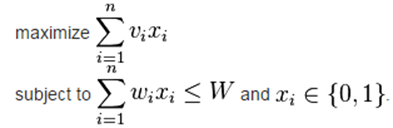


### Standard functions for the knapsack problem (load_data, fitness, is_valid, generate_valid_sol, get_neighbour...)

In [10]:
import numpy as np

def load_data(file_name: str) -> "list[tuple[int, int]], int, int":
    weights_and_values = []
    with open(file_name) as f:
        lines = f.readlines()
        num_items = int(lines[0].strip())
        for line in lines[1:num_items + 1]:
            parts = line.split()
            weight, value = int(parts[1]), int(parts[2])
            weights_and_values.append((weight, value))
        capacity = int(lines[num_items + 1].strip())
    return weights_and_values, capacity, num_items

def generate_solution(n: int):
    """
        Generate solution of length n using binary encoding
        Input:
          n: int
        Output:
          sol: list
              - binary encoding solution
    """
    return np.random.randint(2, size=n).tolist()

def fitness(solution: list[int], data: list[tuple[int, int]], capacity: int) -> tuple[int, int]:
    """
    Fitness function to evaluate the solution for the knapsack problem by calculating the total weight and value of the solution
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        total weight, total value of solution
    """
    total_value = 0
    total_weight = 0

    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += data[i][1]
            total_weight+= data[i][0]

    return total_weight, total_value

def is_valid(solution: list[int], data: list[tuple[int, int]], capacity: int) -> bool:
    """
    Check if the solution is valid by checking if the total weight of the solution is less than the capacity
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        bool: True if the solution is valid, False otherwise
    """
    weight = fitness(solution, data, capacity)[0]

    return weight <= capacity

def generate_valid_sol(data: list[tuple[int, int]], capacity: int) -> list[int]:
    """
    Generate a valid solution by generating random solutions until a valid solution is found
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        list: a valid solution
    """
    while True:
        solution = generate_solution(len(data))
        if is_valid(solution, data, capacity):
            return solution

def get_neighbour(solution: list[int]) -> list[int]:
    """
    Get a neighbour of the solution by flipping a random bit
    Input:
        solution: list of 0s and 1s representing the inclusion of items
    Output:
        list: a neighbour of the solution
    """
    neighbour = solution.copy()
    index = np.random.randint(len(neighbour))
    if neighbour[index] == 0:
        neighbour[index] = 1
    else:
        neighbour[index] = 0

    return neighbour


### **Idea of the Simulated Annealing Algorithm**
   - Start with a random solution
   - Calculate the fitness of the solution
   - Generate a neighbour of the solution
   - Calculate the fitness of the neighbour
   - If the neighbour has a better fitness, accept it
   - If the neighbour has a worse fitness, accept it with a probability of $e^{(fitness_{neighbour} - fitness_{solution})/T}$
   - Repeat the process for a certain number of iterations
   - Update the temperature $T$ after each iteration
   - Return the best solution found

In [12]:
def simulated_annealing_knapsack(data: list[tuple[int, int]], capacity: int, max_iter: int, T: float, Tmin: float, alpha: float) -> tuple[list[int], int, int]:
    """
    Simulated Annealing algorithm to solve the knapsack problem
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        max_iter: int, maximum number of iterations
        T: float, initial temperature
        Tmin: float, minimum temperature
        alpha: float, cooling rate
    Output:
        best_solution: list, best solution found
        best_weight: int, total weight of the best solution
        best_value: int, total value of the best solution
    """
    current_solution = generate_valid_sol(data, capacity)
    current_weight, current_value = fitness(current_solution, data, capacity)
    best_solution = current_solution[:]
    best_weight, best_value = current_weight, current_value

    while T > Tmin:
        for _ in range(max_iter):

            # Generate a valid neighbour
            max_attempts = 1000
            attempts = 0
            while attempts < max_attempts:
                neighbour = get_neighbour(current_solution)
                if is_valid(neighbour, data, capacity):
                    break
                attempts += 1
            else:
                neighbour = current_solution[:]
            # If a valid neighbour is not found after a certain number of attempts, use the current solution
            neighbour_weight, neighbour_value = fitness(neighbour, data, capacity)

            # Accept the neighbour if it has a better fitness or with a probability of e^((neighbour_value - current_value)/T)
            if neighbour_value > current_value: 
                current_solution = neighbour
                current_weight, current_value = neighbour_weight, neighbour_value
            else:
                probability = np.exp((neighbour_value - current_value) / T)
                if np.random.rand() < probability:
                    current_solution = neighbour
                    current_weight, current_value = neighbour_weight, neighbour_value

                # Update the best solution if the current solution is better
                if current_value > best_value:
                    best_solution = current_solution[:]
                    best_weight, best_value = current_weight, current_value
        # Update the temperature
        T *= alpha

    return best_solution, best_weight, best_value

## Functions used to test and document the algorithm

In [25]:
import matplotlib.pyplot as plt
import time

def plot_results_for_diffIt_diff(iterations: list[int], T: list[float]):
    """
    Plot the results of the algorithm for different iterations and temperatures.
    """
    print("| Iterations | Temperature | Value | Computation Time (s)|")
    print("|------------|-------------|-------|----------------------|")
    best_value = 0
    best_temp = float('inf')
    best_iteration = float('inf')
    dict_values = {}
    for i in iterations:
        for t in T:
            start = time.time()
            _, _, val = simulated_annealing_knapsack(data, capacity, i, t, 0.01, 0.99)
            end = time.time()
            comp_time = end - start
            print(f"| {i} | {t} | {val} | {comp_time:.2f} |")
            if val > best_value:
                best_value = val
                best_temp = t
                best_iteration = i
            elif val == best_value:
                if t < best_temp:
                    best_temp = t
                if i < best_iteration:
                    best_iteration = i
            dict_values[(i, t)] = val

    # Plotting
    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(T)))
    markers = ['o', 's', 'D', '^', 'v', '<']

    for idx, t in enumerate(T):
        values = [dict_values[(i, t)] for i in iterations]
        plt.plot(iterations, values, label=f'T = {t}', color=colors[idx], marker=markers[idx % len(markers)], linestyle='-', linewidth=2, markersize=8)

    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title('Simulated Annealing Results with MinT = 0.01, alfa = 0.99', fontsize=16)
    plt.legend(title='Temperature', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f'Best value: {best_value}, Best temperature: {best_temp}, Best iteration: {best_iteration}')

## Testing for `knapsack-20` dataset

| Iterations | Temperature | Value | Computation Time (s)|
|------------|-------------|-------|----------------------|
| 1 | 10 | 664 | 0.02 |
| 1 | 100 | 743 | 0.02 |
| 1 | 1000 | 725 | 0.02 |
| 1 | 10000 | 725 | 0.01 |
| 10 | 10 | 779 | 0.08 |
| 10 | 100 | 787 | 0.14 |
| 10 | 1000 | 787 | 0.13 |
| 10 | 10000 | 785 | 0.13 |
| 100 | 10 | 747 | 0.78 |
| 100 | 100 | 787 | 1.02 |
| 100 | 1000 | 787 | 1.13 |
| 100 | 10000 | 787 | 1.32 |
| 500 | 10 | 782 | 3.59 |
| 500 | 100 | 787 | 4.92 |
| 500 | 1000 | 787 | 5.47 |
| 500 | 10000 | 787 | 6.60 |
| 1000 | 10 | 785 | 7.55 |
| 1000 | 100 | 787 | 9.37 |
| 1000 | 1000 | 787 | 11.21 |
| 1000 | 10000 | 787 | 12.73 |


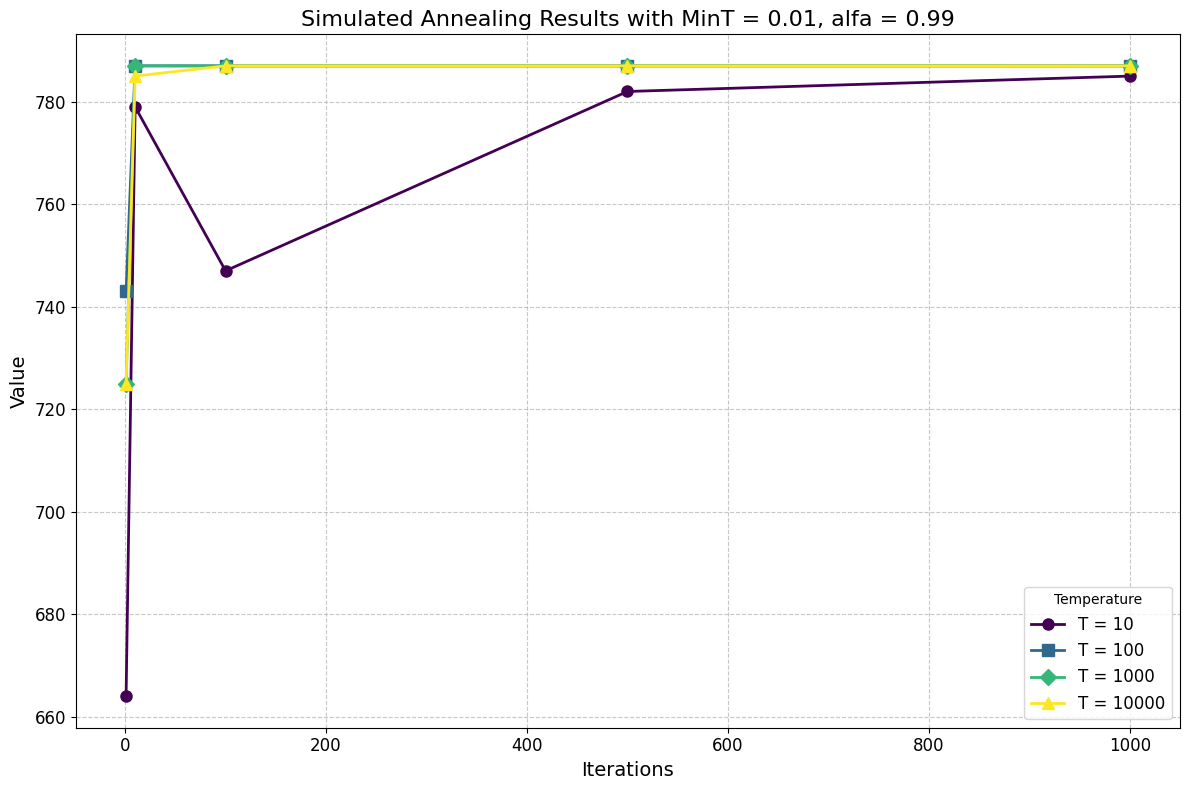

Best value: 787, Best temperature: 100, Best iteration: 10


In [27]:
# PLOT
data, capacity, _ = load_data("data/knapsack/knapsack-20.txt")
values = []
iterations = [1, 10, 100, 500, 1000]
Ts = [10, 100, 1000, 10000]

plot_results_for_diffIt_diff(iterations, Ts)

| Iterations | Temperature | Value | Computation Time (s)|
|------------|-------------|-------|----------------------|
| 1 | 10 | 664 | 0.02 |
| 1 | 100 | 743 | 0.02 |
| 1 | 1000 | 725 | 0.02 |
| 1 | 10000 | 725 | 0.01 |
| 10 | 10 | 779 | 0.08 |
| 10 | 100 | 787 | 0.14 |
| 10 | 1000 | 787 | 0.13 |
| 10 | 10000 | 785 | 0.13 |
| 100 | 10 | 747 | 0.78 |
| 100 | 100 | 787 | 1.02 |
| 100 | 1000 | 787 | 1.13 |
| 100 | 10000 | 787 | 1.32 |
| 500 | 10 | 782 | 3.59 |
| 500 | 100 | 787 | 4.92 |
| 500 | 1000 | 787 | 5.47 |
| 500 | 10000 | 787 | 6.60 |
| 1000 | 10 | 785 | 7.55 |
| 1000 | 100 | 787 | 9.37 |
| 1000 | 1000 | 787 | 11.21 |
| 1000 | 10000 | 787 | 12.73 |

# Results and conclusions for `knapsack-20` dataset
## Plot:
   - The results show that the value increases as the number of iterations increases.
   - The value also increases as the temperature increases, but the improvement is not as significant as the number of iterations for this dataset.
   - The results converge to a similar value after around 100 iterations.
## Table:
   - The computation time increases as the number of iterations and temperature increase.
   - It is a trade-off between better solutions and computation time.
   - The temperature does not  affect the computation time as much as iteration number.
   - The algorithm has a moderate computation time, especially for a large number of iterations and high temperatures.
    
### Observations:.
   - The fastest best-solution (787) obtained was  for 10 iterations and a temperature of 100.
   - Higher temperatures and iteration generally got the best solution everytime for this dataset.
   - A temperature of 100-500 and around 100 iterations should be enough to get a close enough solution to a global optima for a small dataset like this one.
   - The algorithm is efficient with careful selection of the parameters

## Testing for `rucsac-200.txt` dataset

| Iterations | Temperature | Value | Computation Time (s)|
|------------|-------------|-------|----------------------|
| 1 | 10 | 95391 | 0.03 |
| 1 | 1000 | 96049 | 0.07 |
| 1 | 10000 | 96723 | 0.07 |
| 10 | 10 | 96675 | 0.38 |
| 10 | 1000 | 97267 | 0.60 |
| 10 | 10000 | 97640 | 0.72 |
| 100 | 10 | 95983 | 3.72 |
| 100 | 1000 | 97872 | 6.24 |
| 100 | 10000 | 97530 | 7.20 |
| 1000 | 10 | 96019 | 37.97 |
| 1000 | 1000 | 98095 | 61.61 |
| 1000 | 10000 | 98311 | 70.02 |
| 5000 | 10 | 94956 | 184.38 |
| 5000 | 1000 | 98942 | 315.59 |
| 5000 | 10000 | 98817 | 346.50 |
| 10000 | 10 | 95900 | 368.97 |
| 10000 | 1000 | 99147 | 628.76 |
| 10000 | 10000 | 98673 | 701.54 |


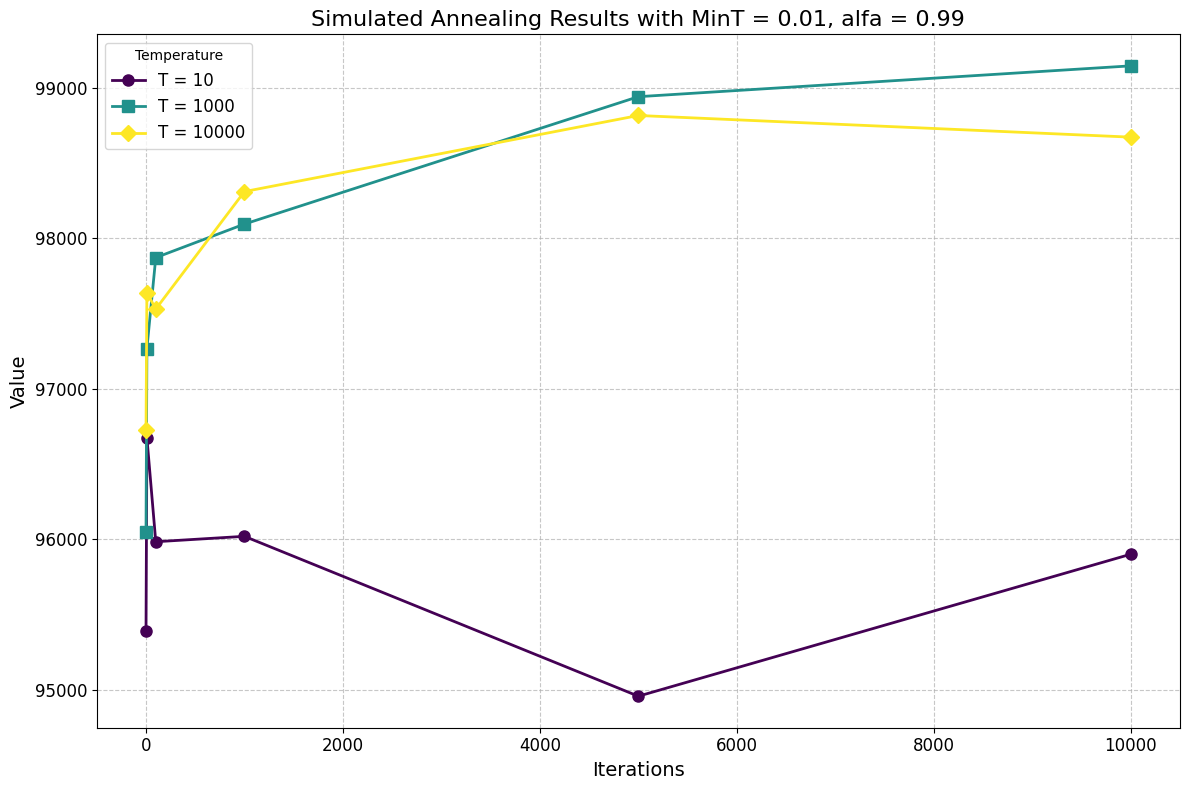

Best value: 99147, Best temperature: 1000, Best iteration: 10000


In [28]:
# TEST
data, capacity, _ = load_data("data/knapsack/rucsac-200.txt")
values = []
iterations = [1, 10, 100, 1000, 5000, 10000]
Ts = [10, 1000, 10000]

plot_results_for_diffIt_diff(iterations, Ts)

| Iterations | Temperature | Value | Computation Time (s)|
|------------|-------------|-------|----------------------|
| 1 | 10 | 95391 | 0.03 |
| 1 | 1000 | 96049 | 0.07 |
| 1 | 10000 | 96723 | 0.07 |
| 10 | 10 | 96675 | 0.38 |
| 10 | 1000 | 97267 | 0.60 |
| 10 | 10000 | 97640 | 0.72 |
| 100 | 10 | 95983 | 3.72 |
| 100 | 1000 | 97872 | 6.24 |
| 100 | 10000 | 97530 | 7.20 |
| 1000 | 10 | 96019 | 37.97 |
| 1000 | 1000 | 98095 | 61.61 |
| 1000 | 10000 | 98311 | 70.02 |
| 5000 | 10 | 94956 | 184.38 |
| 5000 | 1000 | 98942 | 315.59 |
| 5000 | 10000 | 98817 | 346.50 |
| 10000 | 10 | 95900 | 368.97 |
| 10000 | 1000 | 99147 | 628.76 |
| 10000 | 10000 | 98673 | 701.54 |

In [29]:
import seaborn as sns
import numpy as np


def plot_results_for_diffIt_diff_alpha_heatmap(iterations: list[int], T: float, Tmin: float, alphas: list[float]):
    """
    Plot the results of the algorithm for different iterations and alpha values using a heatmap.
    """
    print("| Iterations | Alpha | Value | Computation Time (s)|")
    print("|------------|-------|-------|----------------------|")
    results = np.zeros((len(iterations), len(alphas)))
    best_value = 0
    best_alpha = float('inf')
    best_iteration = float('inf')
    
    for i_idx, i in enumerate(iterations):
        for a_idx, a in enumerate(alphas):
            start = time.time()
            _, _, val = simulated_annealing_knapsack(data, capacity, i, T, Tmin, a)
            end = time.time()
            comp_time = end - start
            print(f"| {i} | {a} | {val} | {comp_time:.2f} |")
            results[i_idx, a_idx] = val
            if val > best_value:
                best_value = val
                best_alpha = a
                best_iteration = i
            elif val == best_value:
                if a < best_alpha:
                    best_alpha = a
                if i < best_iteration:
                    best_iteration = i

    # Plotting heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(results, annot=True, fmt=".1f", xticklabels=alphas, yticklabels=iterations, cmap="YlGnBu")
    plt.xlabel('Alpha', fontsize=14)
    plt.ylabel('Iterations', fontsize=14)
    plt.title('Simulated Annealing Results with MinT = 0.01, T = 1000', fontsize=16)
    plt.show()

    print(f'Best value: {best_value}, Best alpha: {best_alpha}, Best iteration: {best_iteration}')

| Iterations | Alpha | Value | Computation Time (s)|
|------------|-------|-------|----------------------|
| 10 | 0.1 | 94926 | 0.00 |
| 10 | 0.5 | 95748 | 0.02 |
| 10 | 0.9 | 96839 | 0.07 |
| 10 | 0.99 | 97249 | 0.70 |
| 100 | 0.1 | 95747 | 0.05 |
| 100 | 0.5 | 96191 | 0.17 |
| 100 | 0.9 | 96991 | 0.59 |
| 100 | 0.99 | 97370 | 6.16 |
| 1000 | 0.1 | 96866 | 0.32 |
| 1000 | 0.5 | 97498 | 0.87 |
| 1000 | 0.9 | 97848 | 5.58 |
| 1000 | 0.99 | 98215 | 61.18 |


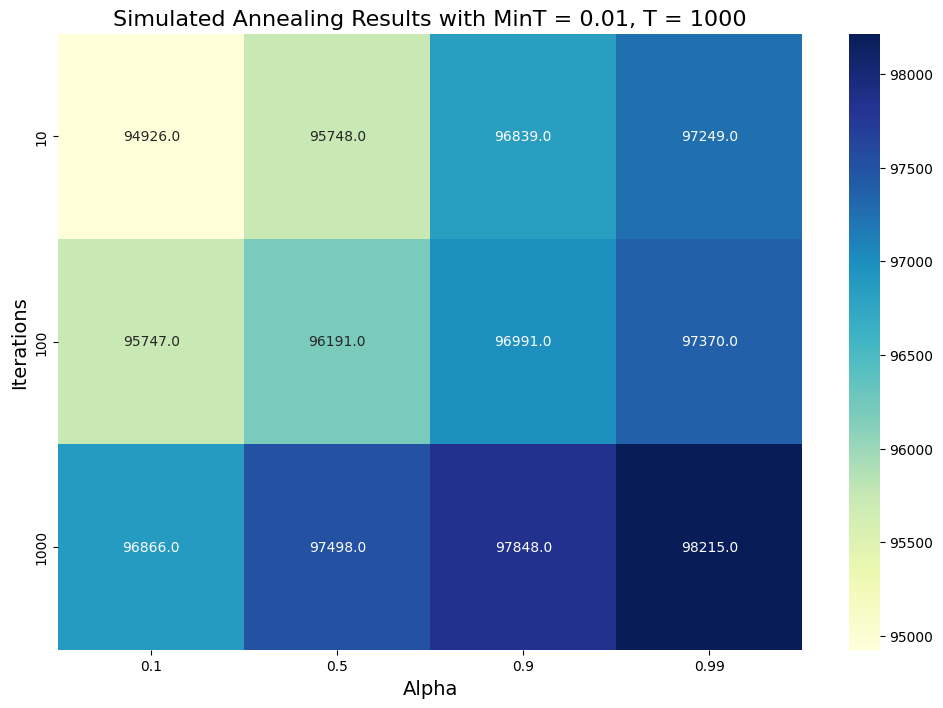

Best value: 98215, Best alpha: 0.99, Best iteration: 1000


In [30]:
iterations = [10, 100, 1000]
alphas = [0.1, 0.5, 0.9, 0.99]

plot_results_for_diffIt_diff_alpha_heatmap(iterations, 1000, 0.01, alphas)

| Iterations | Alpha | Value | Computation Time (s)|
|------------|-------|-------|----------------------|
| 10 | 0.1 | 94926 | 0.00 |
| 10 | 0.5 | 95748 | 0.02 |
| 10 | 0.9 | 96839 | 0.07 |
| 10 | 0.99 | 97249 | 0.70 |
| 100 | 0.1 | 95747 | 0.05 |
| 100 | 0.5 | 96191 | 0.17 |
| 100 | 0.9 | 96991 | 0.59 |
| 100 | 0.99 | 97370 | 6.16 |
| 1000 | 0.1 | 96866 | 0.32 |
| 1000 | 0.5 | 97498 | 0.87 |
| 1000 | 0.9 | 97848 | 5.58 |
| 1000 | 0.99 | 98215 | 61.18 |

# Results and conclusions for `rucsac-200` dataset
## Plot with different iterations/T values:
   - The results show that the value increases as the number of iterations increases.
   - Higher T (temperature) initially offers better exploration of the solution space and better solutions.
   - A very low starting temperature (T=10) does not offer good results for this dataset because it gets stuck around local optima.
   - The jumps in value for iterations get smaller as the number of iterations increases but the values gotten still show improvement even for 10000+ iterations.
## Table for different iterations/T values:
   - For a larger dataset like thi one, the initial T values and iteration numbers have a significant impact on the computation time.
   - Generally, the bigger the computation time was the better solutions were obtained.
## Plot with different iterations/alpha values:
   - The results show that the value still increases as the number of iterations increases.
   - Higher alpha values (0.9, 0.99) offer better solutions for this dataset.
   - The computation time increases as the number of iterations and alpha values increase (the cooling rate is slower).
## Observations:
   - Parameters like T, Tmin, alpha, and the number of iterations have a significant impact on the results, so soft tunning is required especially for large datasets to obtain most value out of the algorithm.
   - The algorithm is efficient for large datasets with careful selection of the parameters.

In [31]:
def get_neighbours(solution: list[int]) -> list[list[int]]:
    """
    Generate neighbours of the solution by flipping a single bit
    Input:
        solution: list of 0s and 1s representing the inclusion of items
    Output:
        list: list of neighbours
    """
    neighbours = []
    
    for i in range(len(solution)):
        neighbour = solution.copy()
        neighbour[i] = 1 - neighbour[i]
        neighbours.append(neighbour)
    
    return neighbours

def tabu_search_knapsack(data: list[tuple[int, int]], capacity: int, max_iter: int, tabu_size: int) -> tuple[list[int], int]:
    """
    Tabu Search algorithm for the knapsack problem
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        max_iter: int, maximum number of iterations
        tabu_size: int, size of the tabu list
    Output:
        int: best solution found and its value
    """
    # Initialize solution
    c = generate_valid_sol(data, capacity)
    best = c
    best_value = fitness(best, data, capacity)[1]
    # Initialize memory
    memory = []

    # Stop condition is the number of iterations
    for _ in range(max_iter):
        # Get neighbours of the current solution
        neighbours = get_neighbours(c)
        best_neighbour = None
        best_neighbour_value = -1

        # Select best neighbour
        for neighbour in neighbours:
            if neighbour not in memory:
                neighbour_value = fitness(neighbour, data, capacity)[1]
                if neighbour_value > best_neighbour_value and is_valid(neighbour, data, capacity):
                    best_neighbour = neighbour
                    best_neighbour_value = neighbour_value

        # Update memory
        if best_neighbour_value > best_value:
            best = best_neighbour
            best_value = best_neighbour_value

        # Add the best neighbour to memory
        memory.append(best_neighbour)
        if len(memory) > tabu_size:
            memory.pop(0)

        # Update current solution
        c = best_neighbour

    return best, best_value

In [36]:
import matplotlib.pyplot as plt
import time

def plot_comparison(data: list[tuple[int, int]], capacity: int, iterations: list[int], tabu_size: int, T: float, Tmin: float, alpha: float):
    """
    Plot the comparison between Simulated Annealing and Tabu Search
    """
    sa_results = []
    ts_results = []
    
    print("| Algorithm | Iterations | Value | Computation Time (s) |")
    print("|-----------|------------|-------|----------------------|")

    for iter_count in iterations:
        start = time.time()
        _ , _, sa_value = simulated_annealing_knapsack(data, capacity, iter_count, T, Tmin, alpha)
        end = time.time()
        sa_time = end - start
        print(f"| SA        | {iter_count}      | {sa_value} | {sa_time:.2f}|")
        sa_results.append((iter_count, sa_value, sa_time))

        start = time.time()
        _ , ts_value = tabu_search_knapsack(data, capacity, iter_count, tabu_size)
        end = time.time()
        ts_time = end - start
        print(f"| TS        | {iter_count}      | {ts_value} | {ts_time:.2f} |")
        ts_results.append((iter_count, ts_value, ts_time))


    # Plot the results
    sa_values = [result[1] for result in sa_results]
    ts_values = [result[1] for result in ts_results]

    plt.figure(figsize=(12, 8))
    plt.plot(iterations, sa_values, label='Simulated Annealing', marker='o', color='blue')
    plt.plot(iterations, ts_values, label='Tabu Search', marker='o', color='red')
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title('Comparison between Simulated Annealing and Tabu Search', fontsize=16)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

| Algorithm | Iterations | Value | Computation Time (s) |
|-----------|------------|-------|----------------------|
| SA        | 10      | 96996 | 0.60|
| TS        | 10      | 96048 | 0.04 |
| SA        | 100      | 98092 | 6.32|
| TS        | 100      | 96657 | 0.44 |
| SA        | 1000      | 97955 | 62.29|
| TS        | 1000      | 95445 | 4.55 |
| SA        | 2500      | 98219 | 151.44|
| TS        | 2500      | 95543 | 11.26 |
| SA        | 5000      | 98745 | 306.59|
| TS        | 5000      | 95556 | 22.84 |
| SA        | 10000      | 98547 | 614.12|
| TS        | 10000      | 95843 | 41.93 |


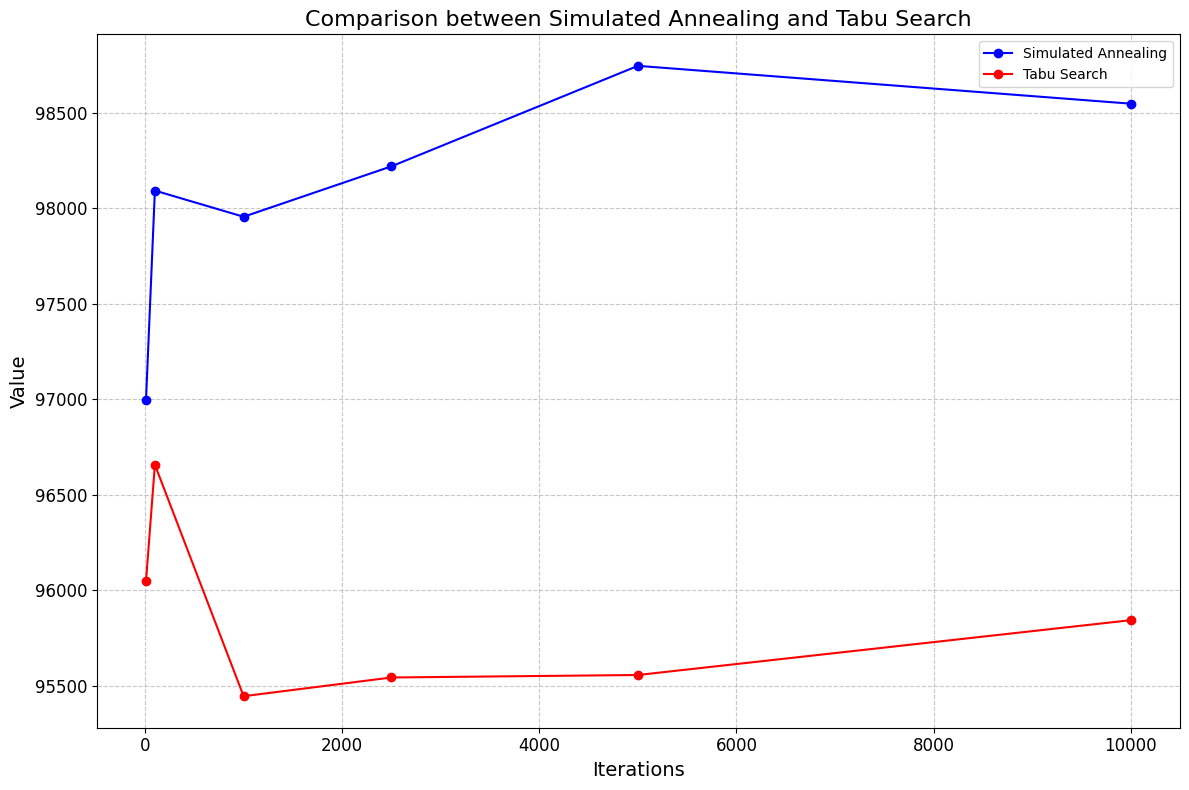

In [38]:
iterations = [10, 100, 1000, 2500, 5000, 10000]
tabu_size = 15
T = 1000
Tmin = 0.01
alpha = 0.99
plot_comparison(data, capacity, iterations, tabu_size, T, Tmin, alpha)

| Algorithm | Iterations | Value | Computation Time (s) |
|-----------|------------|-------|----------------------|
| SA        | 10      | 96996 | 0.60|
| TS        | 10      | 96048 | 0.04 |
| SA        | 100      | 98092 | 6.32|
| TS        | 100      | 96657 | 0.44 |
| SA        | 1000      | 97955 | 62.29|
| TS        | 1000      | 95445 | 4.55 |
| SA        | 2500      | 98219 | 151.44|
| TS        | 2500      | 95543 | 11.26 |
| SA        | 5000      | 98745 | 306.59|
| TS        | 5000      | 95556 | 22.84 |
| SA        | 10000      | 98547 | 614.12|
| TS        | 10000      | 95843 | 41.93 |

# Comparison between Simulated Annealing and Tabu Search conclusions

#### Exploration vs Exploitation

- SA: Focuses on exploration by accepting worse solutions with a probability based on the temperature, bigger exploitation with lower acceptance rate (alpha).
- TS: Focuses on exploitation by avoiding revisited solutions, better for structured search spaces.

#### Memory Usage

- SA: Does not require additional memory beyond the current solution and best solution.
- TS: Requires memory to store the tabu list to avoid revisiting solutions.

#### Solution Quality

- SA: Can escape local optima due to its probabilistic nature.
- TS: Tends to converge to local optima, in my tests TS did not leave de 95000-96000 range for maximum values, while SA always went beyond.

#### Convergence Speed

- SA: Slower convergence because of the probabilistic nature and exploration of the solution space.

- TS: Faster convergence due to the tabu list and exploitation of the local solution space.

#### When to Use 
- SA: when the problem space is unstructured and unconstrained, where exploration is more important than avoiding revisited solutions. SA is ideal when a global optimum is required, and the problem space is complex.
- TS: when the problem space is structured and constrained, where avoiding revisited solutions is more important than exploration. TS is ideal when a local optimum is sufficient, and the problem space is simple.